# 公益財団法人アイヌ文化振興・研究推進機構　単語リスト




In [2]:
import ssl
from urllib3.util import create_urllib3_context
from urllib3 import PoolManager
from requests.adapters import HTTPAdapter
from requests import Session


class AddedCipherAdapter(HTTPAdapter):
    def init_poolmanager(self, connections, maxsize, block=False):
        ctx = create_urllib3_context(ciphers=":HIGH:!DH:!aNULL")
        self.poolmanager = PoolManager(
            num_pools=connections, maxsize=maxsize, block=block, ssl_context=ctx
        )
        ctx.check_hostname = False
        ctx.verify_mode = ssl.CERT_NONE


s = Session()

s.mount("https://www.ff-ainu.or.jp", AddedCipherAdapter())

In [3]:
from pathlib import Path

OUTPUT_DIR = Path("../output")
OUTPUT_SRC_DIR = OUTPUT_DIR / "src"
if not OUTPUT_SRC_DIR.exists():
    OUTPUT_SRC_DIR.mkdir(parents=True)

In [14]:
def download_pdf(url: str, filename: str) -> Path:
    if (OUTPUT_SRC_DIR / filename).exists():
        print(f"File {filename} already exists")
        return OUTPUT_SRC_DIR / filename
    response = s.get(url, verify=False)
    response.raise_for_status()
    with open(OUTPUT_SRC_DIR / filename, "wb") as f:
        f.write(response.content)
    return OUTPUT_SRC_DIR / filename

## 樺太

In [15]:
KARAFUTO_URL = "https://www.ff-ainu.or.jp/web/potal_site/files/karahuto_tango.pdf"
KARAHUTO_PDF = download_pdf(KARAFUTO_URL, "karahuto_tango.pdf")


File karahuto_tango.pdf already exists


In [16]:
from pypdf import PdfReader

ain_ja_raw = ""
ja_ain_raw = ""
with open(KARAHUTO_PDF, "rb") as f:
    pdf_reader = PdfReader(f)
    for i, page in enumerate(pdf_reader.pages, 1):
        if 2 <= i <= 9:
            ain_ja_raw += page.extract_text()
        elif 10 <= i:
            ja_ain_raw += page.extract_text()

print("\n".join(ain_ja_raw.split("\n")[:15]))
print("=" * 100)
print("\n".join(ja_ain_raw.split("\n")[:15]))

「からふとのアイヌご」 「初級アイヌ語－カラフト－」 「中級アイヌ語－カラフト－」
単語リスト（アイヌ語 ・ 日本語）
＊略語一覧
名 ： 名詞、位名 ： 位置名詞、代名 ： 代名詞、形名 ： 形式名詞、完 ： 完全動詞、自 ： 自動詞、他 ： 他動詞、副 ： 副詞、後副 ：
後置副詞、 連体 ： 連体詞、 間投 ： 間投詞、 助動 ： 助動詞、 格助 ： 格助詞、 副助 ： 副助詞、  終助 ： 終助詞、 接助 ： 接続助詞、
人接 ： 人称接辞、接頭 ： 接頭辞、接美 ： 接美辞、単 ： 単数形、複 ： 複数形、所 ： 所属形
■ア■
アシネ asne ５つの 【連体】
アシネヘ asneh ５つ 【名】
アハカシ ahkas 歩く 【自】
アハカポ ahkapo 弟、坊や 【名】
アハ カポホ  ahkapoho 弟 、坊や  【名】
（ahkapo の所属形）
アハカリ ahkari ～より、以上に 【後副】
アハスイ ahsuy １回 【名、副】
■あ■
挨拶、挨拶する　イライメヘ
（～の）間、中　トゥンケ
（～の）間、中　トゥム
間　ウトゥルケ
アイヌ語　アイヌイタハ
合の手の掛け声　ヨーレパシ
会う　エカリ
和え物　チカリペ
青　シウニン
垢　トゥルフ
垢　トゥル
垢　トゥリヒ
赤い　フーレ
あかり、松明　スネ


In [17]:
import regex

for line in ain_ja_raw.split("\n"):
    if "2イワンペ" in line:
        print("found:", line)

ain_ja_raw = ain_ja_raw.replace("2イワンペ", "イワンペ")
ain_ja_raw = ain_ja_raw.replace("3オソーコテ", "オソーコテ")
ain_ja_raw = ain_ja_raw.replace("5チシ", "チシ")
ain_ja_raw = ain_ja_raw.replace("6ネア", "ネア")
ain_ja_raw = ain_ja_raw.replace("8ワハカライキ", "ワハカライキ")
terms = []

for line in ain_ja_raw.split("\n")[6:]:
    if line.startswith("■"):
        continue
    # if line.startswith("（"):
    # continue

    if terms and regex.match(r"^(?:[^\p{sc=Kana}]|ウキンカ|ポの守護神|カー 【)", line):
        terms[-1] += line
        # print(line)
        pass
    else:
        terms.append(line)

with open(OUTPUT_SRC_DIR / "ff-ainu-karahuto-terms.tsv", "w") as f:
    for term in terms:
        # print(term)
        # print("-" * 100)
        if "木（名）" in term:
            term = term.replace("木（名）", "木【名】")
        if matched := regex.match(
            r"^([\p{scx=Kana} ー\d]+?) ?([\p{sc=Latn}=]+)[ 　]([^【]*)(【.*】)?(.*)?", term
        ):
            print(matched.groups())
            result_line = "\t".join([group if group else "" for group in matched.groups()])
            # result_line = regex.sub(r"（(.+?)\t(.+?)[）)]", "（$1）", result_line)
            f.write(result_line + "\n")
            # f.write(matched.group(0).replace(" ", "\t") + "\n")
            # f.write(term.replace(" ", "\t") + "\n")
        # else:
        #     print(term)
    #     print("=" * 100)

found: 2イワンペ iwanpe 6 つ 【名】
('アシネ', 'asne', '５つの ', '【連体】', '')
('アシネヘ', 'asneh', '５つ ', '【名】', '')
('アハカシ', 'ahkas', '歩く ', '【自】', '')
('アハカポ', 'ahkapo', '弟、坊や ', '【名】', '')
('アハ カポホ ', 'ahkapoho', '弟 、坊や  ', '【名】', '（ahkapo の所属形）')
('アハカリ', 'ahkari', '～より、以上に ', '【後副】', '')
('アハスイ', 'ahsuy', '１回 ', '【名、副】', '')
('アハチ', 'ahci', 'お婆さん ', '【名】', '')
('アハチヒ', 'ahcihi', 'お婆さん ', '【名】', ' （ahci の所属形）')
('アハテ', 'ahte', '～をかける ', '【他】', '')
('アハト', 'ahto', '雨 ', '【名】', '')
('アハトゥリ', 'ahturi', 'ヤチブキ、エゾノリュウキンカ ', '【名】', '')
('アハ トポクン ', 'ahtopokun', '雨宿りする  ', '【自】', '')
('アハニ', 'ahni', 'オヒョウの木 ', '【名】', '')
('アハルシ', 'ahrus', '樹皮衣 ', '【名】', '')
('アー', 'aa', '座る ', '【自】', '')
('アータイ', 'aatay', '座る台、腰掛 ', '【名】', '')
('アーチャ', 'aaca', '父さん ', '【名】', '')
('アーチャハ', 'aacaha', '父さん ', '【名】', ' （aaca の所属形）')
('アーチャポ', 'aacapo', 'おじさん ', '【名】', '')
('アーネ', 'aane', '細い ', '【自】', '')
('アーフンカ ', 'aahunka', 'コオリガモ ', '【名】', '（鳥の名）')
('アイ', 'ay', '矢 ', '【名】', '')
('アイヌ', 'aynu', '人間、男性、アイヌ民族 ', '【名】', '')
('

Then modify ff-ainu by hand to clean the text

In [18]:
from typing import TypedDict


class Term(TypedDict):
    lemma: str
    glosses: list[str]
    poses: list[str]
    notes: str
# ＊略語一覧
# 名：名詞、位名：位置名詞、代名：代名詞、形名：形式名詞、完：完全動詞、自：自動詞、他：他動詞、副：副詞、後副：
# 後置副詞、連体：連体詞、間投：間投詞、助動：助動詞、格助：格助詞、副助：副助詞、 終助：終助詞、接助：接続助詞、
# 人接：人称接辞、接頭：接頭辞、接美：接美辞、単：単数形、複：複数形、所：所属形

ABBREVIATIONS = {
    "名": "名詞",
    "位名": "位置名詞",
    "代名": "代名詞",
    "形名": "形式名詞",
    "完": "完全動詞",
    "完動": "完全動詞",
    "自": "自動詞",
    "他": "他動詞",
    "副": "副詞",
    "後副": "後置副詞",
    "連体": "連体詞",
    "間投": "間投詞",
    "助動": "助動詞",
    "格助": "格助詞",
    "副助": "副助詞",
    "終助": "終助詞",
    "接助": "接続助詞",
    "接": "接続詞",
    "人接": "人称接辞",
    "接頭": "接頭辞",
    "接美": "接尾辞",
    "単": "単数形",
    "複": "複数形",
    "所": "所属形",
    "複他": "複他動詞",
    "疑問": "疑問詞",
    "代名？": "代名詞",
    "指定": "繋辞",
    "序動": "助動詞",
    "接尾": "接尾辞",
}
terms: list[Term] = []
with open(OUTPUT_SRC_DIR / "ff-ainu-karahuto-terms.tsv", "r") as f:
    for line in f:
        splitted = line.strip("\n").split("\t")
        kana, lemma, glosses, poses, notes = splitted
        print(kana, lemma, glosses, poses, notes, sep="\t")

        glosses = [gloss.strip().replace(" ", "") for gloss in regex.split(r"[、，・]", glosses)]
        poses = [posse.strip() for posse in regex.split(r"[、・]", poses.strip("【】"))]
        poses = [ABBREVIATIONS.get(pos, pos) for pos in poses]
        notes = regex.sub(r"\s+|（|）", "", notes.strip())

        term = Term(
            lemma=regex.sub(r"\s+", "", lemma),
            glosses=glosses,
            poses=poses,
            notes=notes,
        )
        terms.append(term)

アシネ	asne	５つの 	【連体】	
アシネヘ	asneh	５つ 	【名】	
アハカシ	ahkas	歩く 	【自】	
アハカポ	ahkapo	弟、坊や 	【名】	
アハ カポホ 	ahkapoho	弟 、坊や  	【名】	（ahkapo の所属形）
アハカリ	ahkari	～より、以上に 	【後副】	
アハスイ	ahsuy	１回 	【名、副】	
アハチ	ahci	お婆さん 	【名】	
アハチヒ	ahcihi	お婆さん 	【名】	 （ahci の所属形）
アハテ	ahte	～をかける 	【他】	
アハト	ahto	雨 	【名】	
アハトゥリ	ahturi	ヤチブキ、エゾノリュウキンカ 	【名】	
アハ トポクン 	ahtopokun	雨宿りする  	【自】	
アハニ	ahni	オヒョウの木 	【名】	
アハルシ	ahrus	樹皮衣 	【名】	
アー	aa	座る 	【自】	
アータイ	aatay	座る台、腰掛 	【名】	
アーチャ	aaca	父さん 	【名】	
アーチャハ	aacaha	父さん 	【名】	 （aaca の所属形）
アーチャポ	aacapo	おじさん 	【名】	
アーネ	aane	細い 	【自】	
アーフンカ 	aahunka	コオリガモ 	【名】	（鳥の名）
アイ	ay	矢 	【名】	
アイヌ	aynu	人間、男性、アイヌ民族 	【名】	
アイヌイタハ	aynuitah	アイヌ語 	【名】	
アイネ	ayne	ずっと～した結果 	【接助】	
アイヘ	ayhe	矢 	【名】	 （ay の所属形）
アウ	aw	舌 	【名】	
アウェヘ	awehe	舌 	【名】	 （aw の所属形）
アシ	asi	～を閉める 	【他】	
アシヒネ	asihne	５つの 	【連体】	
アシヒネヘ	asihneh	５つ 	【名】	
アシリ	asiri	新しい 	【自】	
アシン	asin	出る 	【自】	
アシンコホ	asinkoh	出ると 	【自・接助】	（kestoasinkoh 毎日）
アタイェヘ	atayehe	値段、 価値 	【名】	 （atayの所属形）
アチャポ	acapo	おじさん 	【名】	
アトゥイ	atuy	海 	【名】	
アトゥフ	atuhu	ひも 	【名】	 （ah の所属形）
アトゥヨウシ	atuyousi	沖（水平線近く）  	【名】	
アナハ	a

In [19]:
from collections import Counter

counter = Counter(t for term in terms for t in term["poses"])
for pos, count in counter.most_common():
    print(pos, count)


名詞 534
自動詞 191
他動詞 151
副詞 52
位置名詞 41
連体詞 28
疑問詞 21
接続助詞 19
助動詞 19
複他動詞 16
副助詞 12
間投詞 11
後置副詞 10
代名詞 10
人称接辞 9
格助詞 6
形式名詞 4
終助詞 4
完全動詞 4
複数形 2
接続詞 2
接尾辞 2
繋辞 1
接頭辞 1


In [20]:
import json

with open(OUTPUT_DIR / "ff-ainu-karahuto-terms.json", "w") as f:
    json.dump(terms, f, ensure_ascii=False)


## 沙流

In [22]:
SARU_URL = "https://www.ff-ainu.or.jp/web/potal_site/files/saru_tango.pdf"
SARU_PDF = download_pdf(SARU_URL, "saru_tango.pdf")



File saru_tango.pdf already exists


In [26]:
import regex as re
reader = PdfReader(SARU_PDF)
number_of_pages = len(reader.pages)
text = "\n".join(page.extract_text() for page in reader.pages[1:8])
text = text.split("■ア■")[1]
text = re.sub(r"■.■\n", "", text)
text = re.sub(r"\nd\n", "", text)
text = re.sub(r"(?<![】］])\s*\n", "", text)
print(text[:500] + "...")
print()

ア a= 私たち 【人接】
ア a 座る 【自】  ［単］
アアン aan ～だった 【助動】
アイヌ aynu 人 【名】
アイヌイタ ク Aynuitak アイヌ語【名】
アイヌフラ aynuhura 人間のにおい【名】
アイネ ayne ～したあげく 【接助】
アエプ aep 食べ物 【名】
アオイペプ aoipep 食器 【名】
アオカ aoka 私たち【代名】
アキヒ akihi ～の弟 【名】  ［所］
アク ak 弟 【名】
アクス akusu ～したところ 【接助】
アシ asi ～を立てる 【他】
アシ as 立つ 【自】  ［単］
アシ =as 私たち 【人接】
アシケペチ askepeci ～の指 【名】  ［所］
アシケペチヒ askepecihi ～の指 【名】 ［所］
アシク asik 5 【間投】
アシクネ asikne 5つの 【連体】
アシクネプ asiknep 5つ 【名】
アシクネン asiknen 5人 【名】
アシヌマ asinuma 私（物語で）  【代名】
アシリ asir 新しい 【自】
アシリパノミ asirpanomi 新年の祈り 【...



In [27]:
lines = text.splitlines()
print(f"Lines: {len(lines)}. Contents:")

duplicated_lines = [l for l in text.splitlines() if l.count("】") > 1]

pattern = r"(.*?【.*?】[^\p{Katakana}]*］?)\s*"

for line in duplicated_lines:
    index = lines.index(line)  # Find the index of the line in the original list
    matches = re.findall(pattern, line)
    # Replace the line at the found index with the split lines
    lines[index : index + 1] = matches

lines = lines[:-1]

for l in lines:
    print(l)

Lines: 970. Contents:
ア a= 私たち 【人接】
ア a 座る 【自】  ［単］
アアン aan ～だった 【助動】
アイヌ aynu 人 【名】
アイヌイタ ク Aynuitak アイヌ語【名】
アイヌフラ aynuhura 人間のにおい【名】
アイネ ayne ～したあげく 【接助】
アエプ aep 食べ物 【名】
アオイペプ aoipep 食器 【名】
アオカ aoka 私たち【代名】
アキヒ akihi ～の弟 【名】  ［所］
アク ak 弟 【名】
アクス akusu ～したところ 【接助】
アシ asi ～を立てる 【他】
アシ as 立つ 【自】  ［単］
アシ =as 私たち 【人接】
アシケペチ askepeci ～の指 【名】  ［所］
アシケペチヒ askepecihi ～の指 【名】 ［所］
アシク asik 5 【間投】
アシクネ asikne 5つの 【連体】
アシクネプ asiknep 5つ 【名】
アシクネン asiknen 5人 【名】
アシヌマ asinuma 私（物語で）  【代名】
アシリ asir 新しい 【自】
アシリパノミ asirpanomi 新年の祈り 【名】
アシン asin 出る 【自】  ［単］
アシンル asinru 便所 【名】
アチャポ acapo おじさん 【名】 
アッ at 発生する 【自】
アッカリ akkari ～より 【後副】
アッケテク akketek ホタテガイ 【名】
アッサプ assap かい（櫂）  【名】
アットﾟシ attus 樹皮衣 【名】
アッニ atni オヒョウ 【名】
アトﾟイ atuy 海 【名】
アトﾟポキ  atupoki ～のわき 【名】 ［所］
アナク anak ～は 【副助】
アナクネ anakne ～は 【副助】 
アニ ani ～で 【格助】
アニ ani ～なさい 【終助】
アヌ anu ～を置く 【他】
アネ ane 細い 【自】
アハ aha ヤブマメ 【名】
アパ apa 戸 【名】
アハタ ahata ヤブマメ掘りをする【自】
アパッポ apappo 花 【名】
アプカシ apkas 歩く 【自】
アプト apto 雨 【名】
アプニタラ  apunitara やすらかに【副】
アフプ ahup 入る 【自】  ［複］


In [29]:
"""Divide lines into words and add to a table"""

table = []
for line in lines:
    # re.sub(r"\s(?=\/)|(?>\/)\s", "", line)
    # re.sub(r"(?=【)", " ", line)
    matched = re.match(
        r"([^\p{Latin}]+)\s*([^\p{Hiragana}\p{Katakana}\p{Han}\p{N}～]+)\s*([^【]+?)\s*(【.*)",
        line,
    )
    if not matched:
        continue
    kana, latn, glss, tags = map(lambda x: x.replace(" ", ""), matched.groups())
    pos_match = re.match(r"【(.*)】", tags)
    sub_match = re.match(r"［(.*)］", tags)
    pos = pos_match.group(1) if pos_match else None
    sub = sub_match.group(1) if sub_match else None
    table.append((kana, latn, glss, pos, sub))
    # print(matched.groups())
    # print(result)
print(len(table))

with open(OUTPUT_SRC_DIR / "ff-ainu-saru-terms.tsv", "w") as f:
    for kana, latn, glss, pos, sub in table:
        f.write(f"{kana}\t{latn}\t{glss}\t{pos}\t{sub}\n")


975


In [31]:
# print the longest words
longest_words = sorted(table, key=lambda x: len(x[1]), reverse=True)
for kana, latn, glss, pos, sub in longest_words[:10]:
    print(kana, latn, glss, pos, sub, sep="\t")


レクトﾟンペ	rekutumpe/rekutunpe	首飾り布	名	None
エケウトﾟムシノチタラ　	ekewtumusinocitara	～で気分が楽しい	他	None
ワンパッカ	wampakka/wanpakka	手袋	名	None
エヤイコシラムスイパ　	eyaykosiramsuypa	～について考える	名	None
ホプンパ	hopumpa/hopunpa	起きる	自	None
ルアンペアシテカムイ　	ruanpeastekamuy	雨を降らす神	名	None
シンリッコイチャラパ	sinritkoicarpa	先祖に供物を捧げる	自	None
コタンコロカムイ	kotankorkamuy	シマフクロウ	名	None
シケトクナワノ	siketoknawano	目の先から	副	None
ピリカモンライケ	pirkamonrayke	よい仕事をする	自	None


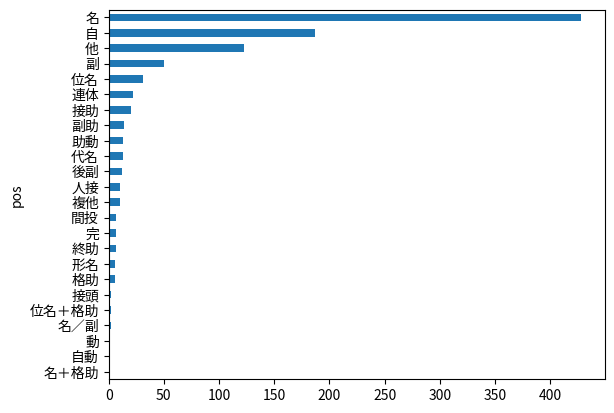

In [52]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd

font_manager.fontManager.addfont("/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc")
plt.rcParams["font.family"] = "Noto Sans CJK JP"

data = pd.DataFrame(table, columns=["kana", "latn", "glss", "pos", "sub"])
data["pos"].value_counts().plot.barh()
# make the largest bar the first
plt.gca().invert_yaxis()
plt.show()
